## Background

McCurrConsultancy is an MNC that has thousands of employees spread across the globe. The company believes in hiring the best talent available and retaining them for as long as possible. A huge amount of resources is spent on retaining existing employees throughvarious initiatives. The Head of People Operations wants to bring down the cost of retaining employees. For this, he proposes limiting the incentives to only those employees who are at risk of attrition. As a recently hired Data Scientist in the People Operations Department, you have been asked to identify patterns in characteristics of employees who leave the organization. Also, you have to use this information to predict if an employee is at risk of attrition. This information will be used to target themwith incentives and in turn curb attrition.

## Objective

To predict if an employee is going to attrite or not. Apply feature engineering and model tuning to obtain 85% to 95% accuracy.

## Features description

Education:<br>
    1. 'Below College'
	2. 'College'
	3. 'Bachelor'
	4. 'Master'
	5. 'Doctor'
	
EnvironmentSatisfaction:<br>
    1. 'Low'
	2. 'Medium'
	3. 'High'
	4. 'Very High'
	
JobInvolvement:<br>
    1. 'Low'
	2. 'Medium'
	3. 'High'
	4. 'Very High'
	
JobSatisfaction:<br>
    1. 'Low'
	2. 'Medium'
	3. 'High'
	4. 'Very High'
	
PerformanceRating:<br>
    1. 'Low'
	2. 'Good'
	3. 'Excellent'
	4. 'Outstanding'
	
RelationshipSatisfaction:<br>
    1. 'Low'
	2. 'Medium'
	3. 'High'
	4. 'Very High'
	
WorkLifeBalance:<br>
    1. 'Bad'
	2. 'Good'
	3. 'Better'
	4. 'Best'

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# reading data
data=pd.read_excel('HR_Employee_Attrition Dataset.xlsx')
data.head()

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,...,1,80,0,8,0,1,6,4,0,5
1,2,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,...,4,80,1,10,3,3,10,7,1,7
2,3,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,2,80,0,7,3,3,0,0,0,0
3,4,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,...,3,80,0,8,3,3,8,7,3,0
4,5,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [3]:
print("Data consists of {} observation and {} features".format(*data.shape))

Data consists of 2940 observation and 34 features


In [4]:
# the ratings should be converted to categorical data as they are not numerical
cols=['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 
      'PerformanceRating','RelationshipSatisfaction', 'WorkLifeBalance', 'JobLevel', 'StockOptionLevel']
data[cols]=data[cols].astype('category')

In [5]:
# checking the data type in each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   EmployeeNumber            2940 non-null   int64   
 1   Attrition                 2940 non-null   object  
 2   Age                       2940 non-null   int64   
 3   BusinessTravel            2940 non-null   object  
 4   DailyRate                 2940 non-null   int64   
 5   Department                2940 non-null   object  
 6   DistanceFromHome          2940 non-null   int64   
 7   Education                 2940 non-null   category
 8   EducationField            2940 non-null   object  
 9   EnvironmentSatisfaction   2940 non-null   category
 10  Gender                    2940 non-null   object  
 11  HourlyRate                2940 non-null   int64   
 12  JobInvolvement            2940 non-null   category
 13  JobLevel                  2940 non-null   catego

In [6]:
# checking for duplicated data points
data.duplicated().sum()

0

In [7]:
# Checking for missing data
data.isnull().any()

EmployeeNumber              False
Attrition                   False
Age                         False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesLastYear       False
WorkLifeBalanc

### Comment
There are no missing or duplicated data

In [8]:
# Checking for the number of unique values in each column
data.nunique()

EmployeeNumber              2940
Attrition                      2
Age                           43
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCom

In [9]:
# the employee Number is useless as it is unique to each employee so it should be dropped
# Standard hours and over 18 have only one value we can drop them as well
data=data.drop(['EmployeeNumber', 'StandardHours', 'Over18'], axis=1)

In [10]:
# list of numerical features
col_num=data.select_dtypes(np.number).columns
col_num

Index(['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [11]:
# list of categorical data:
col_cat=data.select_dtypes(include=['object', 'category']).columns
col_cat

Index(['Attrition', 'BusinessTravel', 'Department', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'WorkLifeBalance'],
      dtype='object')

In [12]:
# descriptive stats of numerical features
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2940.0,36.923810,9.133819,18.0,30.0,36.0,43.0,60.0
DailyRate,2940.0,802.485714,403.440447,102.0,465.0,802.0,1157.0,1499.0
DistanceFromHome,2940.0,9.192517,8.105485,1.0,2.0,7.0,14.0,29.0
HourlyRate,2940.0,65.891156,20.325969,30.0,48.0,66.0,84.0,100.0
MonthlyIncome,2940.0,6502.931293,4707.155770,1009.0,2911.0,4919.0,8380.0,19999.0
MonthlyRate,2940.0,14313.103401,7116.575021,2094.0,8045.0,14235.5,20462.0,26999.0
NumCompaniesWorked,2940.0,2.693197,2.497584,0.0,1.0,2.0,4.0,9.0
PercentSalaryHike,2940.0,15.209524,3.659315,11.0,12.0,14.0,18.0,25.0
TotalWorkingYears,2940.0,11.279592,7.779458,0.0,6.0,10.0,15.0,40.0
TrainingTimesLastYear,2940.0,2.799320,1.289051,0.0,2.0,3.0,3.0,6.0


## Inference
* there are different ranges of values in this dataset so maybe it is good idea to normalize the data before modeling
* the min values for some features are zero however in all cases having zero make sense and they are valid datapoint 

In [13]:
# Creating a trsnformer class to convert the discrete values to categories for EDA
from sklearn.base import BaseEstimator, TransformerMixin

class ToCategories(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self,x, y=None):
        return self
    
    def transform(self,x):
        _x=x.copy()
        _x['Education']=_x['Education'].replace({1:'below college',2:'college',3:'bachelor',4:'master',5:'doctor'})
        _x['EnvironmentSatisfaction']=_x['EnvironmentSatisfaction'].replace({
            1:'low', 2:'medium', 3:'high', 4:'very high'
        })
        _x['JobInvolvement']=_x['JobInvolvement'].replace({
            1:'low', 2:'medium', 3:'high', 4:'very high'
        })
        _x['JobSatisfaction']=_x['JobSatisfaction'].replace({
            1:'low', 2:'medium', 3:'high', 4:'very high'
        })
        _x['PerformanceRating']=_x['PerformanceRating'].replace({
            1:'low', 2:'good', 3:'excellent', 4:'outstanding'
        })
        _x['RelationshipSatisfaction']=_x['RelationshipSatisfaction'].replace({
            1:'low', 2:'medium', 3:'high', 4:'very high'
        })
        _x['WorkLifeBalance']=_x['WorkLifeBalance'].replace({
            1:'bad', 2:'good', 3:'better', 4:'best'
        })
        return _x

In [14]:
# Univariate EDA:
data.skew()

Age                        0.413075
DailyRate                 -0.003517
DistanceFromHome           0.957629
HourlyRate                -0.032294
MonthlyIncome              1.369117
MonthlyRate                0.018568
NumCompaniesWorked         1.025947
PercentSalaryHike          0.820709
TotalWorkingYears          1.116601
TrainingTimesLastYear      0.552842
YearsAtCompany             1.763628
YearsInCurrentRole         0.916895
YearsSinceLastPromotion    1.983277
YearsWithCurrManager       0.833025
dtype: float64

* The most skewed variables are YearsAtCompany and YearsSinceLastPromotion

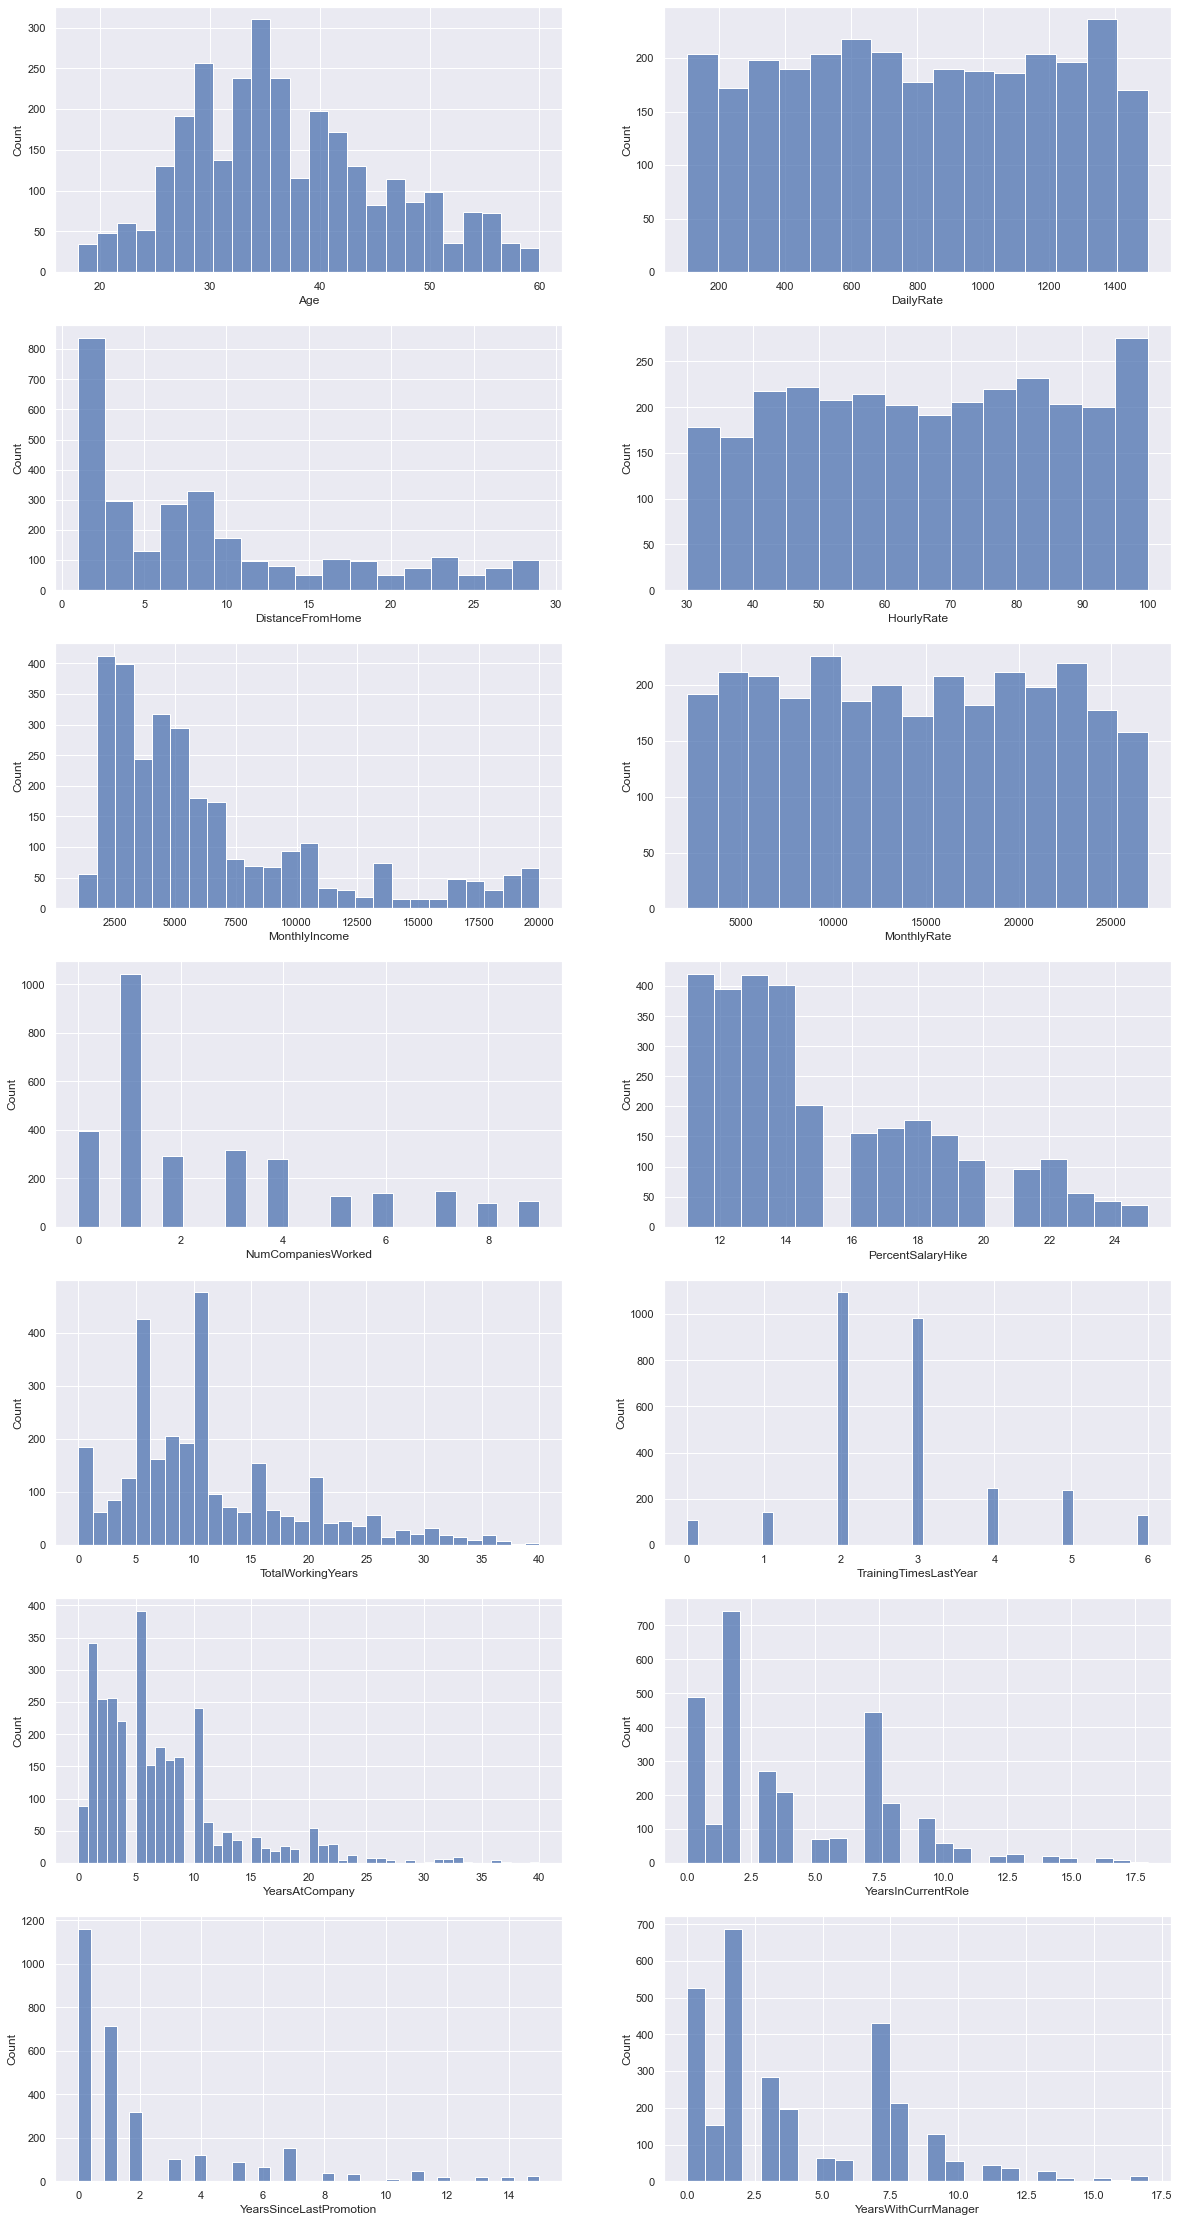

In [15]:
# distributions:
# plotting the histograms for numerical features
f, ax=plt.subplots(7,2, figsize=(20,40))
for i,c in enumerate(col_num):
    sns.histplot(data[c], ax=ax[i//2, i%2])

In [16]:
#  Bivariate EDA:

data.corr()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.024287,0.497855,0.028051,0.299635,0.003634,0.680381,-0.019621,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,0.023381,0.007707,-0.032182,0.038153,0.022704,0.014515,0.002453,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.031131,-0.017014,0.027473,-0.029251,0.040235,0.004628,-0.036942,0.009508,0.018845,0.010029,0.014406
HourlyRate,0.024287,0.023381,0.031131,1.000000,-0.015794,-0.015297,0.022157,-0.009062,-0.002334,-0.008548,-0.019582,-0.024106,-0.026716,-0.020123
MonthlyIncome,0.497855,0.007707,-0.017014,-0.015794,1.000000,0.034814,0.149515,-0.027269,0.772893,-0.021736,0.514285,0.363818,0.344978,0.344079
MonthlyRate,0.028051,-0.032182,0.027473,-0.015297,0.034814,1.000000,0.017521,-0.006429,0.026442,0.001467,-0.023655,-0.012815,0.001567,-0.036746
NumCompaniesWorked,0.299635,0.038153,-0.029251,0.022157,0.149515,0.017521,1.000000,-0.010238,0.237639,-0.066054,-0.118421,-0.090754,-0.036814,-0.110319
PercentSalaryHike,0.003634,0.022704,0.040235,-0.009062,-0.027269,-0.006429,-0.010238,1.000000,-0.020608,-0.005221,-0.035991,-0.001520,-0.022154,-0.011985
TotalWorkingYears,0.680381,0.014515,0.004628,-0.002334,0.772893,0.026442,0.237639,-0.020608,1.000000,-0.035662,0.628133,0.460365,0.404858,0.459188
TrainingTimesLastYear,-0.019621,0.002453,-0.036942,-0.008548,-0.021736,0.001467,-0.066054,-0.005221,-0.035662,1.000000,0.003569,-0.005738,-0.002067,-0.004096


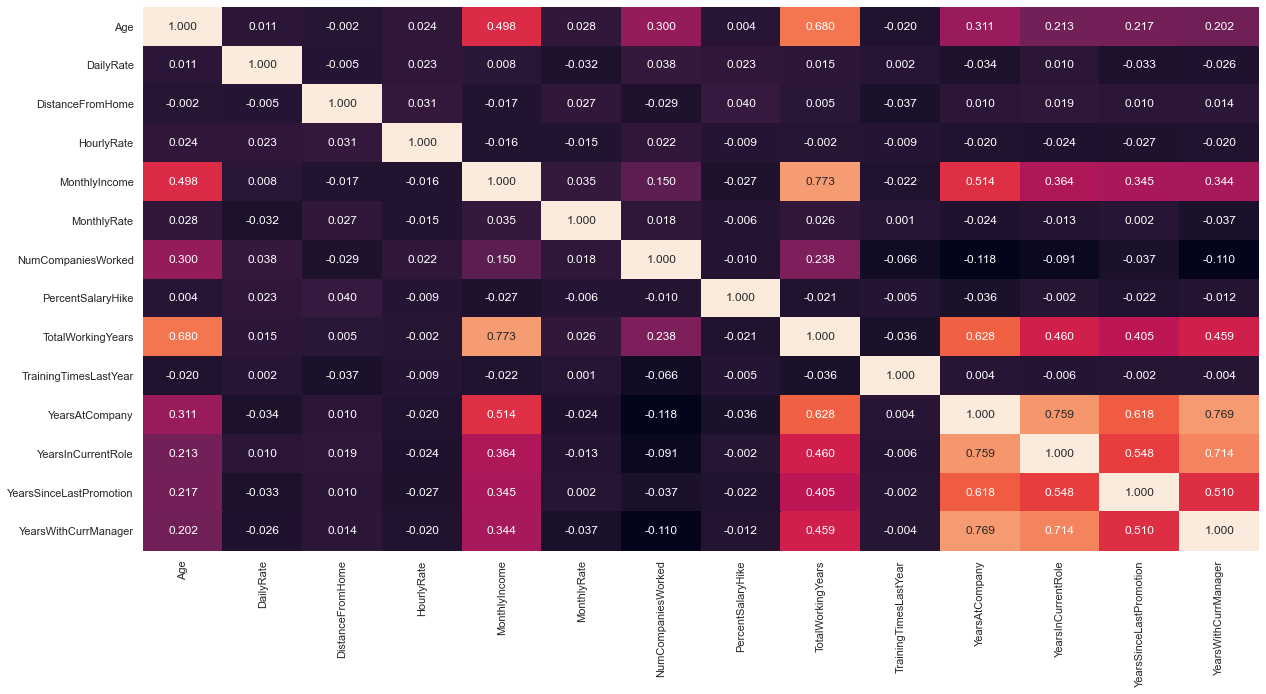

In [17]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, fmt='0.3f', cbar=False);

## Inference
* there is positive correlation between Age and TotalWorkingYears, Age and JobLevel, JobLevel and TotalWorkingYears, JobLevel and MonthlyIncome, PerformanceRating and PercentSalaryHike, YearsAtCompany and YearsInCurrentRole, YearsAtCompany and YearsSinceLastPromotion, YearsAtCompany and YearsWithCureentManager
* we could drop JobLevel and YearsAtCompany as they have strong correlation with other features such as MonthlyIncome and YearsAtCurrentRole. However, as the data is not huge I kept those features

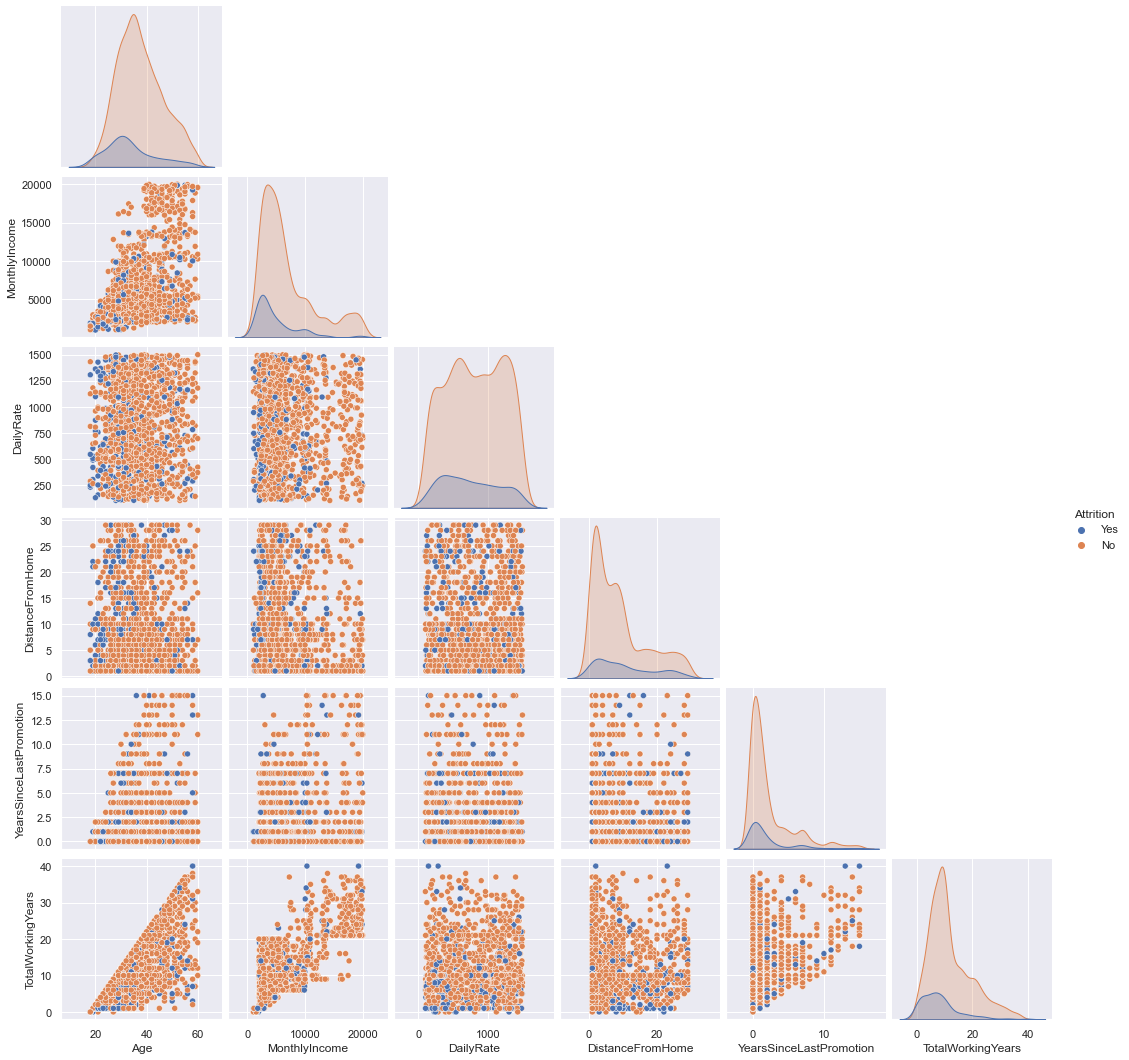

In [18]:
# as pairplot takes a long time for this data I did it for selected features

columns=['Attrition', 'Age', 'MonthlyIncome', 'DailyRate', 'DistanceFromHome',  
         'YearsSinceLastPromotion', 'TotalWorkingYears']
sns.pairplot(data[columns], corner=True, diag_kind='kde', hue='Attrition');

## Comment

there is not any obvious pattern in the dataset and the distribution of features for those left the company and did not leave the company are the same. 

In [19]:
data.columns

Index(['Attrition', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [20]:
data_cat=ToCategories().fit_transform(data)
data_cat.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,1102,Sales,1,college,Life Sciences,medium,Female,...,excellent,low,0,8,0,bad,6,4,0,5
1,No,49,Travel_Frequently,279,Research & Development,8,below college,Life Sciences,high,Male,...,outstanding,very high,1,10,3,better,10,7,1,7
2,Yes,37,Travel_Rarely,1373,Research & Development,2,college,Other,very high,Male,...,excellent,medium,0,7,3,better,0,0,0,0
3,No,33,Travel_Frequently,1392,Research & Development,3,master,Life Sciences,very high,Female,...,excellent,high,0,8,3,better,8,7,3,0
4,No,27,Travel_Rarely,591,Research & Development,2,below college,Medical,low,Male,...,excellent,very high,1,6,3,better,2,2,2,2


In [21]:
data_cat['Attrition_Yes']=(data_cat['Attrition']=='Yes').astype('int32')

In [22]:
# bivariate categorical EDA:
# percentage of diferenet categories that left the company

pd.pivot_table(data=data_cat, values='Attrition_Yes', index='Education', aggfunc='sum') \
    .sort_values(by='Attrition_Yes',ascending=False)/data_cat['Attrition_Yes'].sum()*100

,Attrition_Yes
Education,
bachelor,41.772152
master,24.472574
college,18.565401
below college,13.080169
doctor,2.109705


In [23]:
# or we could use groupby
pd.pivot_table(data=data_cat.groupby('Attrition')['Education'].value_counts(normalize=True).mul(100).rename('percentage').reset_index(),
               index='Education', columns='Attrition')

percentage           
Attrition             No        Yes
Education                          
bachelor       38.361719  41.772152
below college  11.273317  13.080169
college        19.302514  18.565401
doctor          3.487429   2.109705
master         27.575020  24.472574

In [24]:
pd.pivot_table(data=data_cat, values='Attrition_Yes', index='EnvironmentSatisfaction',aggfunc='sum') \
.sort_values(by='Attrition_Yes',ascending=False)/data_cat['Attrition_Yes'].sum()*100

,Attrition_Yes
EnvironmentSatisfaction,
low,30.379747
high,26.160338
very high,25.316456
medium,18.143460


In [25]:
pd.pivot_table(data=data_cat, values='Attrition_Yes', index='JobInvolvement',aggfunc='sum') \
.sort_values(by='Attrition_Yes',ascending=False)/data_cat['Attrition_Yes'].sum()*100

,Attrition_Yes
JobInvolvement,
high,52.742616
medium,29.957806
low,11.814346
very high,5.485232


In [26]:
pd.pivot_table(data=data_cat, values='Attrition_Yes', index='JobSatisfaction',aggfunc='sum') \
.sort_values(by='Attrition_Yes',ascending=False)/data_cat['Attrition_Yes'].sum()*100

,Attrition_Yes
JobSatisfaction,
high,30.801688
low,27.848101
very high,21.940928
medium,19.409283


In [27]:
pd.pivot_table(data=data_cat, values='Attrition_Yes', index='PerformanceRating',aggfunc='sum') \
.sort_values(by='Attrition_Yes',ascending=False)/data_cat['Attrition_Yes'].sum()*100

,Attrition_Yes
PerformanceRating,
excellent,84.388186
outstanding,15.611814


In [28]:
pd.pivot_table(data=data_cat, values='Attrition_Yes', index='RelationshipSatisfaction',aggfunc='sum') \
.sort_values(by='Attrition_Yes',ascending=False)/data_cat['Attrition_Yes'].sum()*100

,Attrition_Yes
RelationshipSatisfaction,
high,29.957806
very high,27.004219
low,24.050633
medium,18.987342


In [29]:
pd.pivot_table(data=data_cat, values='Attrition_Yes', index='WorkLifeBalance',aggfunc='sum') \
.sort_values(by='Attrition_Yes',ascending=False)/data_cat['Attrition_Yes'].sum()*100

,Attrition_Yes
WorkLifeBalance,
better,53.586498
good,24.472574
best,11.392405
bad,10.548523


## Inference:
* As shown above there is not a clear negative factor to determine if an employee will leave the company and that's why ML model can be useful to learn the pattern and predict if an employee is at risk of leaving so we can dedicate more resources to keep them in the company

In [30]:
data_cat.drop('Attrition_Yes', axis=1, inplace=True)

## ML modeling

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score, accuracy_score

In [32]:
# one-hot encoding of the categorical data
data=pd.get_dummies(data_cat, drop_first=True)

In [33]:
data.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Attrition_Yes', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Research & Development',
       'Department_Sales', 'Education_below college', 'Education_college',
       'Education_doctor', 'Education_master', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'EnvironmentSatisfaction_low', 'EnvironmentSatisfaction_medium',
       'EnvironmentSatisfaction_very high', 'Gender_Male',
       'JobInvolvement_low', 'JobInvolvement_medium',
       'JobInvolvement_very high', 'JobLevel_2', 'JobLevel_3', 'JobLevel_4',
       'JobLevel_5', 'JobRo

In [34]:
X=data.drop('Attrition_Yes', axis=1)
y=data['Attrition_Yes']

In [35]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [36]:
# logistic regression:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver='liblinear')
model.fit(x_train, y_train)
print(f'training score: {model.score(x_train, y_train)}')
print(f'testing score: {model.score(x_test, y_test)}')

training score: 0.9013605442176871
testing score: 0.891156462585034


In [37]:
pd.Series(data=model.coef_[0], index=X.columns).sort_values(ascending=False).head()

OverTime_Yes                        1.781482
EnvironmentSatisfaction_low         0.994452
BusinessTravel_Travel_Frequently    0.936193
JobInvolvement_low                  0.802002
RelationshipSatisfaction_low        0.737780
dtype: float64

### Comment
* Based on logistic regresion the most important feature is working overtime, low environment Satisfaction, high level of traveling, and low level of Job involvement

In [38]:
# Decision tree:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state=0)
model.fit(x_train, y_train)
print(f'training score: {model.score(x_train, y_train)}')
print(f'testing score: {model.score(x_test, y_test)}')

training score: 1.0
testing score: 0.9591836734693877


In [39]:
pd.Series(data=model.feature_importances_, index=X.columns).sort_values(ascending=False).head()

MonthlyIncome        0.122460
TotalWorkingYears    0.095147
DailyRate            0.089003
MonthlyRate          0.061734
Age                  0.057037
dtype: float64

In [40]:
# degree 2:
pipe=Pipeline([
    ('poly', PolynomialFeatures(degree=2, interaction_only=True)),
    ('model', DecisionTreeClassifier(random_state=0))
])
pipe.fit(x_train,y_train)
print(f'training score: {pipe.score(x_train, y_train)}')
print(f'testing score: {pipe.score(x_test, y_test)}')

training score: 1.0
testing score: 0.9591836734693877


In [41]:
# degree 3:
pipe=Pipeline([
    ('poly', PolynomialFeatures(degree=3, interaction_only=True)),
    ('model', DecisionTreeClassifier(random_state=0))
])
pipe.fit(x_train,y_train)
print(f'training score: {pipe.score(x_train, y_train)}')
print(f'testing score: {pipe.score(x_test, y_test)}')

training score: 1.0
testing score: 0.9455782312925171


* Adding polynomial feature did not change the model performance significantly so we go forward with degree one to make the model training faster

## Different models for classification
1. Logistic regression
2. KNN
3. Decision Tree
4. Random Forest
5. Bagging
6. Adaboost
7. Gradient Boosting
8. SVM
9. ANN

In [42]:
# for consistency I scale data for all methods using StandardScaler
k=KFold(random_state=7, n_splits=5, shuffle=True)

In [43]:
models=[]
cv_accuracy_mean=[]
cv_accuracy_std=[]
test_accuracy=[]

In [44]:
# Logistic Regression
pipe=Pipeline([
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression())
])
pipe.fit(x_train, y_train)
models.append('Logistic Regression')
cv=cross_val_score(pipe, x_train, y_train, cv=k)
cv_accuracy_mean.append(cv.mean())
cv_accuracy_std.append(cv.std())
test_accuracy.append(pipe.score(x_test, y_test))

In [45]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

pipe=Pipeline([
    ('scaler', StandardScaler()),
    ('model', KNeighborsClassifier())
])
pipe.fit(x_train, y_train)
models.append('KNN')
cv=cross_val_score(pipe, x_train, y_train, cv=k)
cv_accuracy_mean.append(cv.mean())
cv_accuracy_std.append(cv.std())
test_accuracy.append(pipe.score(x_test, y_test))

In [46]:
# Decision Tree
pipe=Pipeline([
    ('scaler', StandardScaler()),
    ('model', DecisionTreeClassifier())
])
pipe.fit(x_train, y_train)
models.append('Decision Tree')
cv=cross_val_score(pipe, x_train, y_train, cv=k)
cv_accuracy_mean.append(cv.mean())
cv_accuracy_std.append(cv.std())
test_accuracy.append(pipe.score(x_test, y_test))

In [47]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

pipe=Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(random_state=0))
])
pipe.fit(x_train, y_train)
models.append('Random Forest')
cv=cross_val_score(pipe, x_train, y_train, cv=k)
cv_accuracy_mean.append(cv.mean())
cv_accuracy_std.append(cv.std())
test_accuracy.append(pipe.score(x_test, y_test))

In [48]:
# Bagging
from sklearn.ensemble import BaggingClassifier

pipe=Pipeline([
    ('scaler', StandardScaler()),
    ('model', BaggingClassifier(random_state=0))
])
pipe.fit(x_train, y_train)
models.append('Bagging')
cv=cross_val_score(pipe, x_train, y_train, cv=k)
cv_accuracy_mean.append(cv.mean())
cv_accuracy_std.append(cv.std())
test_accuracy.append(pipe.score(x_test, y_test))

In [49]:
# Adaboost

from sklearn.ensemble import AdaBoostClassifier

pipe=Pipeline([
    ('scaler', StandardScaler()),
    ('model', AdaBoostClassifier(random_state=0))
])
pipe.fit(x_train, y_train)
models.append('Adaboost')
cv=cross_val_score(pipe, x_train, y_train, cv=k)
cv_accuracy_mean.append(cv.mean())
cv_accuracy_std.append(cv.std())
test_accuracy.append(pipe.score(x_test, y_test))

In [50]:
# Gradient boosting

from sklearn.ensemble import GradientBoostingClassifier

pipe=Pipeline([
    ('scaler', StandardScaler()),
    ('model', GradientBoostingClassifier(random_state=0))
])
pipe.fit(x_train, y_train)
models.append('Gradient boosting')
cv=cross_val_score(pipe, x_train, y_train, cv=k)
cv_accuracy_mean.append(cv.mean())
cv_accuracy_std.append(cv.std())
test_accuracy.append(pipe.score(x_test, y_test))

In [51]:
# SVM

from sklearn.svm import SVC

pipe=Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVC(random_state=0))
])
pipe.fit(x_train, y_train)
models.append('SVM')
cv=cross_val_score(pipe, x_train, y_train, cv=k)
cv_accuracy_mean.append(cv.mean())
cv_accuracy_std.append(cv.std())
test_accuracy.append(pipe.score(x_test, y_test))

In [52]:
# ANN

from sklearn.neural_network import MLPClassifier
pipe=Pipeline([
    ('scaler', StandardScaler()),
    ('model', MLPClassifier(random_state=0, activation='relu', max_iter=300, solver='sgd', learning_rate_init=0.01, hidden_layer_sizes=(100,20)))
])
pipe.fit(x_train, y_train)
models.append('ANN')
cv=cross_val_score(pipe, x_train, y_train, cv=k)
cv_accuracy_mean.append(cv.mean())
cv_accuracy_std.append(cv.std())
test_accuracy.append(pipe.score(x_test, y_test))

In [53]:
# ANN tensorflow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [54]:
x_train.shape

(2352, 62)

In [55]:
scaler=StandardScaler()
x_tr=scaler.fit_transform(x_train)
x_te=scaler.transform(x_test)

In [56]:
ANN=Sequential()
ANN.add(Dense(100, activation='relu'))
ANN.add(Dense(20, activation='tanh'))
ANN.add(Dense(1, activation='sigmoid'))
ANN.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [57]:
hist=ANN.fit(x_tr, y_train, epochs=120, verbose=True, validation_split=0.2)

Epoch 1/120
59/59 [==============================] - 1s 13ms/step - loss: 0.6114 - accuracy: 0.6755 - val_loss: 0.4506 - val_accuracy: 0.8450
Epoch 2/120
59/59 [==============================] - 0s 1ms/step - loss: 0.4609 - accuracy: 0.8261 - val_loss: 0.4197 - val_accuracy: 0.8514
Epoch 3/120
59/59 [==============================] - 0s 1ms/step - loss: 0.4071 - accuracy: 0.8467 - val_loss: 0.4081 - val_accuracy: 0.8514
Epoch 4/120
59/59 [==============================] - 0s 1ms/step - loss: 0.3917 - accuracy: 0.8412 - val_loss: 0.3997 - val_accuracy: 0.8514
Epoch 5/120
59/59 [==============================] - 0s 1ms/step - loss: 0.4069 - accuracy: 0.8304 - val_loss: 0.3924 - val_accuracy: 0.8535
Epoch 6/120
59/59 [==============================] - 0s 1ms/step - loss: 0.3797 - accuracy: 0.8457 - val_loss: 0.3858 - val_accuracy: 0.8514
Epoch 7/120
59/59 [==============================] - 0s 1ms/step - loss: 0.3451 - accuracy: 0.8687 - val_loss: 0.3796 - val_accuracy: 0.8577
Epoch 8/120


Epoch 59/120
59/59 [==============================] - 0s 1ms/step - loss: 0.1384 - accuracy: 0.9596 - val_loss: 0.2592 - val_accuracy: 0.9066
Epoch 60/120
59/59 [==============================] - 0s 1ms/step - loss: 0.1345 - accuracy: 0.9622 - val_loss: 0.2574 - val_accuracy: 0.9045
Epoch 61/120
59/59 [==============================] - 0s 1ms/step - loss: 0.1199 - accuracy: 0.9691 - val_loss: 0.2574 - val_accuracy: 0.9172
Epoch 62/120
59/59 [==============================] - 0s 1ms/step - loss: 0.1433 - accuracy: 0.9613 - val_loss: 0.2555 - val_accuracy: 0.9151
Epoch 63/120
59/59 [==============================] - 0s 1ms/step - loss: 0.1214 - accuracy: 0.9674 - val_loss: 0.2553 - val_accuracy: 0.9108
Epoch 64/120
59/59 [==============================] - 0s 1ms/step - loss: 0.1201 - accuracy: 0.9714 - val_loss: 0.2548 - val_accuracy: 0.9108
Epoch 65/120
59/59 [==============================] - 0s 1ms/step - loss: 0.1212 - accuracy: 0.9686 - val_loss: 0.2536 - val_accuracy: 0.9130
Epoch 

59/59 [==============================] - 0s 1ms/step - loss: 0.0361 - accuracy: 0.9975 - val_loss: 0.2030 - val_accuracy: 0.9469
Epoch 117/120
59/59 [==============================] - 0s 1ms/step - loss: 0.0349 - accuracy: 0.9980 - val_loss: 0.2030 - val_accuracy: 0.9469
Epoch 118/120
59/59 [==============================] - 0s 1ms/step - loss: 0.0347 - accuracy: 0.9976 - val_loss: 0.2025 - val_accuracy: 0.9469
Epoch 119/120
59/59 [==============================] - 0s 1ms/step - loss: 0.0311 - accuracy: 0.9979 - val_loss: 0.2032 - val_accuracy: 0.9469
Epoch 120/120
59/59 [==============================] - 0s 1ms/step - loss: 0.0337 - accuracy: 0.9967 - val_loss: 0.2013 - val_accuracy: 0.9469


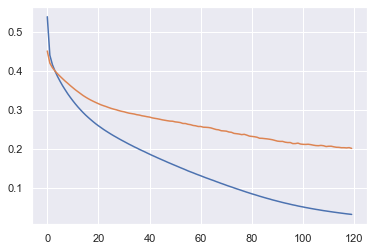

In [58]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss']);

In [59]:
loss, acc=ANN.evaluate(x_te, y_test, verbose=False)
print(f'loss: {loss}, accuracy: {acc}')
models.append('ANN_tf')
cv_accuracy_mean.append(np.nan)
cv_accuracy_std.append(np.nan)
test_accuracy.append(acc)

loss: 0.16909131407737732, accuracy: 0.9557822942733765


In [60]:
df=pd.DataFrame({'model':models,
                'CV_accuracy_mean':cv_accuracy_mean,
                'CV_accuracy_std':cv_accuracy_std,
                'testing_accuracy':test_accuracy})
df=df.set_index('model')
df.sort_values(by='CV_accuracy_mean', ascending=False)

,CV_accuracy_mean,CV_accuracy_std,testing_accuracy
model,,,
ANN,0.953229,0.005878,0.976190
Random Forest,0.946002,0.003731,0.965986
Bagging,0.934097,0.004279,0.947279
SVM,0.915389,0.009651,0.914966
Decision Tree,0.912415,0.000797,0.962585
Gradient boosting,0.912414,0.017901,0.897959
Logistic Regression,0.891146,0.012364,0.897959
Adaboost,0.885627,0.011300,0.880952
KNN,0.859697,0.015115,0.858844


## Comments:
* Based on CV_accuracy_mean, ANN and Random Forest are the best model here for classification prior to hyperparameter tuning
* Bagging is the third best algorithms with almost similar accuracy
* However the accuracy of the models in above table is based on untuned hyperparameters and we can improve the model performance. From the algorithms above, I selected Random Forest, Gradient boosting, and SVM for further hyperparameter tuning using GridSearch and RandomSearch

In [61]:
# Grid search to improve the performance of Random Forest classifier:

from sklearn.model_selection import GridSearchCV
params={
    'bootstrap': [True, False],
    'max_depth': [3,4,None],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1,3,4],
    'min_samples_split': [2,3,5],
    'n_estimators': [4,25,50]    
}

grid=GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=params,cv=k)
grid.fit(x_train, y_train)
model=['Random forest after grid search']
tr=[grid.score(x_train, y_train)]
te=[grid.score(x_test, y_test)]

print(grid.best_params_)

{'bootstrap': False, 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 25}


In [62]:
# Grid search to improve the performance of SVM classifier:
pipe=Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVC(random_state=0))
])
params={
    'model__C': [0.1, 1, 10, 100],
    'model__kernel' : ['linear', 'poly', 'rbf']    
}

grid_svm=GridSearchCV(estimator=pipe, param_grid=params,cv=k)
grid_svm.fit(x_train, y_train)
model.append('SVM after grid search')
tr.append(grid_svm.score(x_train, y_train))
te.append(grid_svm.score(x_test, y_test))

print(grid_svm.best_params_)

{'model__C': 10, 'model__kernel': 'rbf'}


In [63]:
# Random search to improve the prformance of Gradient Boosting:

from sklearn.model_selection import RandomizedSearchCV

n_estimators=list(range(50, 150, 25))
max_features=['log2', 'sqrt']
max_depth=list(range(5,10))+[None]
min_samples_split=list(range(2,10))
min_samples_leaf=list(range(1,5))
learning_rate=[float(x) for x in np.linspace(0.1, 1, 10)]


params_rs={'n_estimators': n_estimators,
          'max_features': max_features,
          'max_depth': max_depth,
          'min_samples_split': min_samples_split,
          'min_samples_leaf': min_samples_leaf,
          'learning_rate': learning_rate}

random=RandomizedSearchCV(estimator=GradientBoostingClassifier(random_state=0), 
                          param_distributions=params_rs, cv=k, random_state=7)
random.fit(x_train, y_train)

model.append('Gradient Boosting after RandomCV')
tr.append(random.score(x_train, y_train))
te.append(random.score(x_test, y_test))

In [64]:
results=pd.DataFrame({
    'Model': model,
    'Training score': tr,
    'Testing score': te,
})
results

,Model,Training score,Testing score
0,Random forest after grid search,1.000000,0.969388
1,SVM after grid search,1.000000,0.969388
2,Gradient Boosting after RandomCV,0.999575,0.967687


## Comments:
* The performance of SVM and Gradient boosting improved significantly, but still Random Forest has the best performance for this project and it can predict the results on test set by 97% accuracy